In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy import integrate 
from ipywidgets import widgets 
#from scipy.integrate import odeint

/home/Estudiante/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
alpha= 0.25
beta = 1
gamma = 0.01
delta = 0.01

In [3]:
def derivadas(X,t,alpha,beta,gamma,delta):
    x, y = X 
    dotx = x * (-alpha + gamma * y) 
    doty = y * (beta - delta * x) 
    return np.array([dotx, doty])
    

In [4]:
Nt = 1000 
tmax = 20
t = np.linspace(0,tmax,Nt)
X0 = [0,0.1]
res = integrate.odeint(derivadas, X0, t, args = (alpha, beta, gamma, delta))


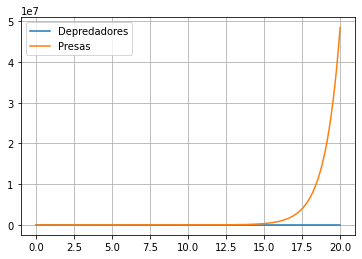

In [6]:
x, y = (res.T)  
plt.plot(t,x, label = 'Depredadores')
plt.plot(t,y, label = 'Presas')
plt.grid()
plt.legend()

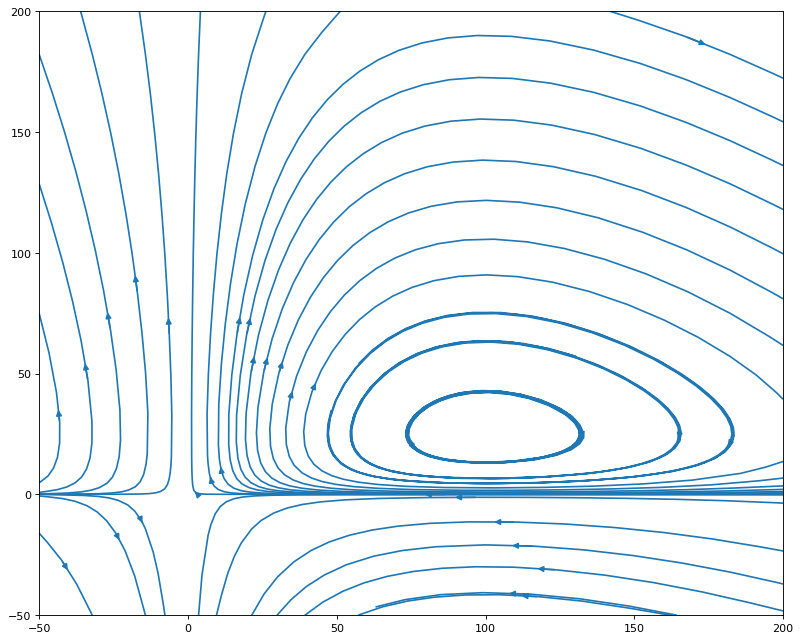

In [23]:
w_1, w_2 = (-50, 200)
Y, X = np.mgrid[w_1:w_2:100j,w_1:w_2:100j]
U = X * (-alpha + gamma * Y)
V = Y * (beta - delta * X)
plt.figure(figsize=(12, 10), dpi=80)

plt.streamplot(X, Y, U, V, density=[0.5,0.5], broken_streamlines = False)




array([[  0.        ,   2.02020202,   4.04040404, ..., 195.95959596,
        197.97979798, 200.        ],
       [  0.        ,   2.02020202,   4.04040404, ..., 195.95959596,
        197.97979798, 200.        ],
       [  0.        ,   2.02020202,   4.04040404, ..., 195.95959596,
        197.97979798, 200.        ],
       ...,
       [  0.        ,   2.02020202,   4.04040404, ..., 195.95959596,
        197.97979798, 200.        ],
       [  0.        ,   2.02020202,   4.04040404, ..., 195.95959596,
        197.97979798, 200.        ],
       [  0.        ,   2.02020202,   4.04040404, ..., 195.95959596,
        197.97979798, 200.        ]])

Modelo SIR


In [49]:
beta = 0.5
gamma = 0.5
N = 10

In [50]:
def derivadas(X,t,beta,gamma,N):
    S, I, R  = X 
    dotS = - beta * S * I / N
    dotI = beta * S * I / N - gamma * I
    dotR = gamma * I 
    return np.array([dotS, dotI, dotR])

Nt = 1000 
tmax = 20
t = np.linspace(0,tmax,Nt)
X0 = [700, 300, 0]
res = integrate.odeint(derivadas, X0, t, args = (beta,gamma,N))


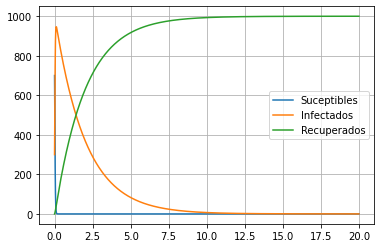

In [51]:
S, I, R = (res.T)  
plt.plot(t,S, label = 'Suceptibles')
plt.plot(t,I, label = 'Infectados')
plt.plot(t,R, label = 'Recuperados')
plt.grid()
plt.legend()

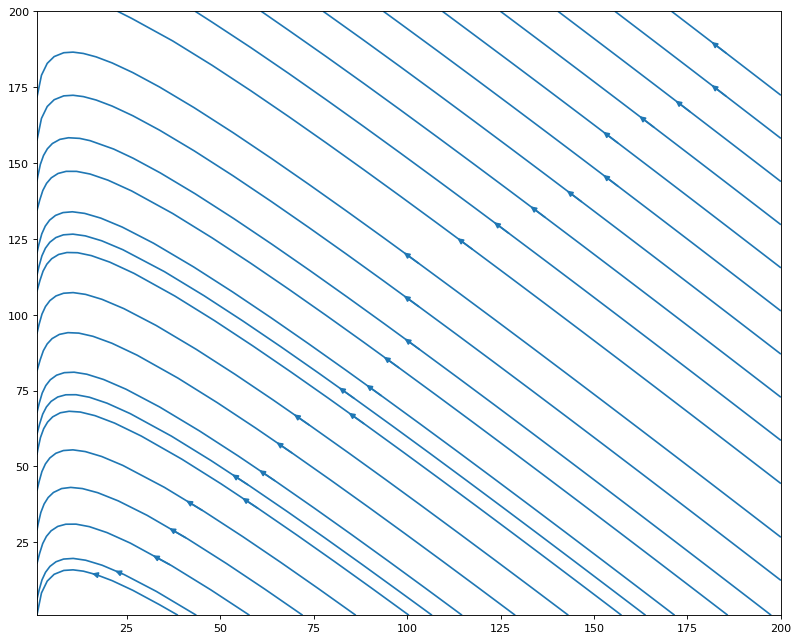

In [48]:
w_1, w_2 = (1, 200)
Y, X = np.mgrid[w_1:w_2:100j,w_1:w_2:100j]
S,I,R = derivadas([X, Y, 1],t,beta,gamma,N)
plt.figure(figsize=(12, 10), dpi=80)

plt.streamplot(X, Y, S, I, density=[0.5,0.5], broken_streamlines = False)



In [77]:
def metodoEulerMemoria(derivada,puntoMemoria,valorMemoria, paso, objetivo, origen, valorInicial):
    #Asumiendo que origen < objetivo
    valorMemoria.extend([valorInicial])
    valores = valorMemoria
    puntoMemoria.extend([origen])
    puntos = puntoMemoria
    puntoActual = origen
    valorActual = valorInicial
    indiceAnterior = 0
    while(puntoActual < objetivo):
        valorActual = valorActual + paso * derivada(puntoActual,valorActual,valores[indiceAnterior])
        puntoActual = puntoActual + paso
        indiceAnterior += 1
        puntos.append(puntoActual)
        valores.append(valorActual)
    return puntos, valores

    


[0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6,
 0.7,
 0.7999999999999999,
 0.8999999999999999]

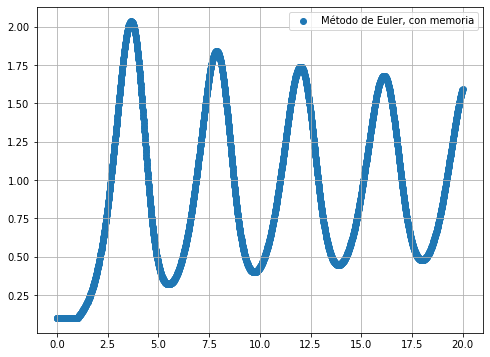

In [98]:
r = 1.6
k = 1

paso = 0.01
objetivo = 20
origen = 1
longitudMemoria = 1
valorInicial = 0.1
puntoMemoria = [0]
valorMemoria = [valorInicial]
for i in range(1,int(longitudMemoria / paso)):
    puntoMemoria.append(puntoMemoria[i-1] + paso)
    valorMemoria.append(valorInicial)

puntos, valores = metodoEulerMemoria(lambda t, f,fanterior: r*f*(1-fanterior/k), puntoMemoria,valorMemoria,paso, objetivo, origen, valorInicial)

x_values = np.array(puntos)


# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.scatter(puntos, valores, label='Método de Euler, con memoria')

plt.legend()
plt.grid(True)
plt.show()